29.6991176471
60.0


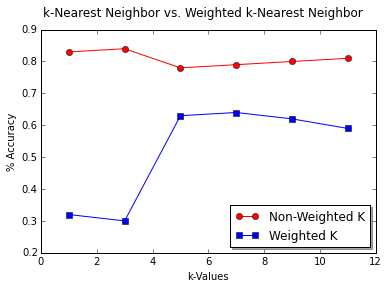

In [24]:
import math
import heapq
import matplotlib.pyplot as plt
#replace missing age with avg age
#convert string into float b/c these lists are a list of strings so age is a string in the list
#age is 6th string in list

file = open("titanicFull.csv", "r")
header = file.readline()
#print header
currentAge = 0
totalAge = 0
count = 0
trainData = []
for line in file:
    singleData = line.rstrip().split(",")
    #trainData.append(singleData)
    #find age of each person
    if singleData[5] != '':
        stringAge = singleData[5] #this is a list right now -- change into string
        #print stringAge
        #change string to float
        currentAge = float(stringAge) #this isn't working right now
        #increment a total age variable
        totalAge = totalAge + currentAge
        #increment number of total people with an age by 1
        count = count + 1
        
#close file
file.close()
    
#find avg age
avg = totalAge/count
print avg

file = open("titanicFull.csv", "r")
header = file.readline()
for line in file:
    singleData = line.rstrip().split(",")
    if singleData[5] == '':
        strAvg = str(avg) 
        singleData[5] = strAvg
        
    #0 = male
    if singleData[4]=="male":
        singleData.append("0")
    #1 = female
    else:
        singleData.append("1")
        
    trainData.append(singleData)

#print trainData

file.close()

###### manipulate the datasets 

#create function that takes in 2d list and a column num
#and converts the values in that column into a float
def convertToFloat(twoDList, colNum):
    for row in twoDList:    
        #print row[colNum]
        if(row[colNum] != ''):
            row[colNum] = float(row[colNum])
            #print stringToNum 
            
def deleteColumn(twoDList, colNum):
    for row in twoDList:
        del row[colNum]



#remove embarked(11), cabin(10), Ticket(8), Name(2,3), Sex(4) 
deleteColumn(trainData,11)
deleteColumn(trainData,10)
deleteColumn(trainData,8)
deleteColumn(trainData,4)
deleteColumn(trainData,3)
deleteColumn(trainData,2)

#call function for survived
convertToFloat(trainData, 0)
#call function for pclass
convertToFloat(trainData,1)
#call function for age
convertToFloat(trainData,2)
#call function for sibsp
convertToFloat(trainData,3)
#call function for parch
convertToFloat(trainData,4)
#call function for fare
convertToFloat(trainData,5)
#call function for sex
convertToFloat(trainData,6)

#print trainData

#col 0 = survived
#col 1 = PClass
#col 2 = Age
#col 3 = SibSp
#col 4 = Parch
#col 5 = Fare
#col 6 = Sex
#add embarked column

normCol = []
def normalizeData(twoDList,colNum):
    totalSum = 0.0
    tot_square_diff = 0.0
    for row in twoDList:
        normCol.append(row[colNum])
        totalSum = totalSum + float(row[colNum])
    mean = totalSum / len(normCol)
    #print mean
    #print normCol
    for row in twoDList:
        tot_square_diff = tot_square_diff + (mean-float(row[colNum]))**2
    st_dev = math.sqrt(tot_square_diff/len(normCol))
    #print st_dev
    
    for row in twoDList:
        normNum = (float(row[colNum]) - mean) / st_dev
        #print normNum
        row[colNum] = normNum
        
#normalizeData(trainData,0)
normalizeData(trainData,1)
normalizeData(trainData,2)
normalizeData(trainData,3)
normalizeData(trainData,4)
normalizeData(trainData,5)
normalizeData(trainData,6)

def distanceForm(row1, row2):
    totalDist = 0
    #start at one so we don't take into account survived/didn't survive
    colNum = 1
    while colNum < 7:
        dist = (row1[colNum] - row2[colNum]) ** 2
        colNum = colNum + 1
        totalDist = totalDist + dist
    finalDist = math.sqrt(totalDist)
    return finalDist

#can call this in newInstance as opposed to the distanceForm function
def weightedForm(row1, row2):
    totalDist = 0
    colNum = 1
    while colNum < 7:
        dist = (row1[colNum] - row2[colNum]) ** 2
        colNum = colNum + 1
        totalDist = totalDist + dist
    finalDist = math.sqrt(totalDist)
    weightedDist = 1 / ((finalDist+.0001) ** 2)
    return weightedDist

#distanceForm(trainData[0],trainData[1])

#this takes in a new instance and finds the distance b/w it and every other row
#and then applies kNN and sorts the new instance into survived/didn't survive
def newInstance(row1, twoDList, k):
    #this holds all distances in a list
    minList = []
    #this finds the number k lowest distances in minlist and stores them in this list
    kMin = []
    #this list holds the 1's and 0's of survived/didn't survive
    survivedList = []
    for row2 in twoDList:
        #this is for non-weighted
        #dist = distanceForm(row1,row2)
        #this is for weighted
        dist = weightedForm(row1,row2)
        minList.append(dist)
    kMin = heapq.nsmallest(k, minList)
    #counts the indices and keeps track of x in minList
    count = 0
    for x in minList:
        for y in kMin:
            if x == y:
                #minimum holds the row in the 2D list where the k min values are located 
                minimum = twoDList[count]
                #we then put the yes/no 0/1 survived/didn't in a survived list
                survivedList.append(minimum[0])
        count = count + 1
    #print survivedList
    varZero = 0
    varOne = 0
    for x in survivedList:
        if x == 0:
            varZero = varZero + 1
        if x == 1:
            varOne = varOne + 1
    if varZero > varOne:
        return 0
    else:
        return 1
                
#didSurvive = newInstance(trainData[0],trainData[1], trainData, 3)
#print didSurvive
    
############# CUT DATA INTO TRAINING AND TESTING DATA ################

testData = trainData[0:100]
trainData = trainData[101:]

###function that measures accuracy
#percentCount = 0
def accuracy(row,surv):
    #print()
    #print surv
    #print row[0]
    #print()
    if(surv == 0 and row[0]==0.0):
        #percentCount += 1
        return 1
    if(surv == 1 and row[0]==1.0):
        #percentCount += 1
        return 1
    else: 
        #percentCount = percentCount + 0
        return 0
    #totalPercent = (percentCount/len(twoDList)) * 100
    
    
#print testData            
#call newInstance on testdata and pass into survived variable
#need to loop through testData since newInstance only takes in one row at a time
counter = 0
numCorrect = 0.0
while counter < len(testData):
    survived = newInstance(testData[counter], trainData, 20)
    #print survived
    #print counter
    row = testData[counter]
    numCorrect += accuracy(row,survived)
    #print numCorrect
    counter += 1
    
totalPercent = (numCorrect/len(testData)) * 100
print totalPercent


#make a plot
#y axis should be accuracy
#x axis should be k

%matplotlib inline

xvals = [1,3,5,7,9,11]
#normalized using z-scores, non-weighted
series1 = [.83,.84,.78,.79,.80,.81]
#normalized using z-scores, weighted
series2 = [.32,.30,.63,.64,.62,.59]

plt.suptitle('k-Nearest Neighbor vs. Weighted k-Nearest Neighbor',fontsize=12)
plt.xlabel('k-Values')
plt.ylabel('% Accuracy')
plt.plot(xvals,series1,'ro-',label='Non-Weighted K')
plt.plot(xvals,series2,'bs-',label='Weighted K')

plt.legend(loc='lower right', shadow=True)

plt.show()


